# Time Series Deconstruction Assignment
Jordan Smith

## Assignment 

The Time Series Decomposition Assignment provides Construction Time Series Data, which describes the private and public spending on construction in the United States from 2002 through 2013, with some partial data from 2014, in the form of comma separated value sheet. 

From this provided data, the individual is tasked with decomposing the two series (Private and Public) using the most appropriate of the time series decomposition methods that were provide in the previous lecture.  


### Requirements 

- Use pandas to import and complete the analysis
- Use Jupyter for the analysis
- Use markdowns to document the analysis
- For each of the data series: 
    - Compute the squared error for your created model relative to the original data (per month and cumulatively)
    - Compute a pandas column named R2 for each with distinguishing between the two models. 
    - Compute a pandas column named R2Error (again for each model) that shows R2 relative to the original data series. 
- Name the notebook TimeSeries

Initially we begin by importing the provided data, as well as any needed packages for the decomposition:

In [55]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

dfCS = pd.read_csv('ConstructionTimeSeriesDataV2.csv')
dfCS

,Month,Month-Year,Total Construction,Private Construction,Public Construction
0,1,Jan-02,59516,45273,14243
1,2,Feb-02,58588,44475,14113
2,3,Mar-02,63782,49396,14386
3,4,Apr-02,69504,53283,16221
4,5,May-02,73384,55009,18375
...,...,...,...,...,...
141,142,Oct-13,85193,59370,25823
142,143,Nov-13,77931,55191,22741
143,144,Dec-13,71502,52132,19369
144,145,Jan-14,64661,47827,16834


After the data has been pulled in, we should get an idea of what the data looks like when graphed:

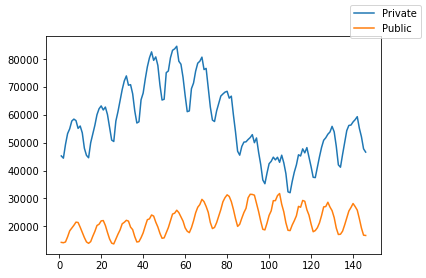

In [56]:
fig,ax = plt.subplots()
ax.plot(dfCS["Month"], dfCS["Private Construction"], label = "Private")
ax.plot(dfCS["Month"], dfCS["Public Construction"], label = "Public")
fig.legend()

From this initial plot, the data for both Private and Public Construction Spending seem to have a non-linear trends in additionaly to cyclicality based on the time of the year. Because of this initial analysis of the data, the decision was made to use the Advanced Time Series Decomposition method shown in the previous lecture. We will choose to use the  

Using a similar formula to the that provided in the module, the model we will create can be explained as: 

$Sprivate\left(m \right) = Tprivate\left( m \right) + Cprivate\left( m \right) + \epsilon \left( m \right)$

and

$Spublic\left(m \right) = Tpublic\left( m \right) + Cpublic\left( m \right) + \epsilon \left( m \right)$

where

- $Sprivate\left( m \right)$ = Private Construction Spending for the Month  $m$
- $Spublic\left(m \right)$ = Public Construction Spending for the Month $m$
- $m$ = the index of the month
- $T\left( m \right)$ = $T$ represents the trend of the data which, in this case, could be nonlinear.  $T\left( m \right)$ is the trend value for Month $m$.
- $C\left( m \right)$ = Cyclicality demand component which plays an analogous role to seasonality, $S\left( q \right)$, except that the pattern repeats after period whose duration might not be one year.
- $\epsilon \left( m \right)$ is the portion of demand that we will not be able to fit with $T \left(m \right)$ and $C \left( m \right)$.


### Private Construction Spending Model

Initially we will work with the Private Construction Data, and try to determine the Trend of this particular series of data. 

A moving average will be computed, replacing a point with the average of a window of the time series information to create a model for the trend. The value of the window variable was varied to find a curve that was smooth, but also allowed for the smalled possible average of squared errors. 

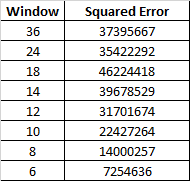

The table above shows the different Squared Error Values that were found. Although the error values get progressively smaller as the window is closed, the graph of the trend gets progressively more volatile. Because of this volatility, the window will held at 12 because the graph of the moving average, is less volatile. 

Average Squared Error per Month:  31701673.583670188


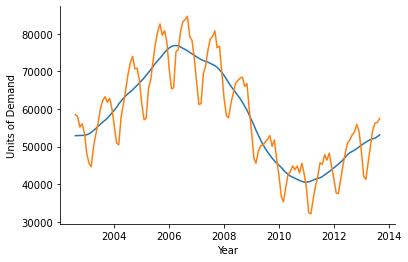

In [57]:
#Creating MovAvg for the Private
dfCS['MovAvg_Priv'] = np.NaN
dfCS['sqErr_Priv'] = np.NaN
#Changing DataFrame index to DateTimeIndex data type for the coming functions 
dfCS.index = pd.DatetimeIndex(freq='m', data=pd.date_range(freq='m',start=pd.Timestamp(year=2002,month=1,day=31),periods=len(dfCS['Month'])))
dfCS

window = 12
window = window-window%2
#Computing the moving average in the loop using a window centered on the point whose avg is being computed
for i in range(int(window/2),dfCS.shape[0]-int(window/2)):
    dfCS.loc[dfCS.index[i],'MovAvg_Priv'] = (0.5*dfCS.iloc[i - int(window/2)]['Private Construction'] + dfCS.iloc[i - int(window/2)+1:i + int(window/2)]['Private Construction'].sum() + 0.5*dfCS.iloc[i + int(window/2)]['Private Construction'])/float(window)

dfCS['sqErr_Priv'] = (dfCS['Private Construction']- dfCS['MovAvg_Priv'])**2

dfCS.dropna(how='any',inplace=True)

fig,ax = plt.subplots()
ax.plot(dfCS['MovAvg_Priv'],label='Moving Avg. Private')
ax.plot(dfCS['Private Construction'],label='Private')
ax.set_xlabel('Year')
ax.set_ylabel('Units of Demand')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
print('Average Squared Error per Month: ',sum(dfCS['sqErr_Priv'])/len(dfCS))

The above graph shows the calculated trend in the system, created by using the moving average with a window of 12 months (6 months before and 6 months after.)

Now that the trend has been estimated, we can move onto the remaining data the needs to be estimated to create a full model of the Private Construction Spending. This is found by looking at the remainder of the data that needs to be estimated, which will be our cyclicality demand for the model.  

Average Residual:  30.595149253731616


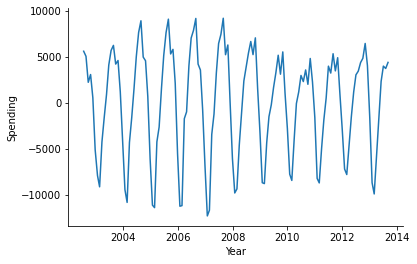

In [58]:
dfCS['R1Priv'] = dfCS['Private Construction'] - dfCS['MovAvg_Priv']
dfCS['R1ErrorPriv'] = abs((dfCS['Private Construction'] - dfCS['R1Priv'])/dfCS['Private Construction'])
dfCS.style.format({
    'MovAvg_Priv': '{:.1f}'.format,
    'sqErr_Priv': '{:,.1f}'.format,
    'R1Priv': '{:,.1f}'.format,
    'R1ErrorPriv': '{:,.3f}'.format
})

fig,ax = plt.subplots()
ax.plot(dfCS['R1Priv'])
ax.set_xlabel('Year')
ax.set_ylabel('Spending')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
print('Average Residual: ', sum(dfCS['R1Priv'])/len(dfCS))

Above we can see the remaining data that needs to be accounted for in the cyclicality portion of our model. 

To find the repeating pattern in the remaining data, we will use an auto correlation to see where the greatest amount of correlation is in the data and gives us an idea of the dominant period of the cyclicality.

In [59]:
maxCorr = 0.0
period = np.NaN
for i in range(1,25):
    corr = dfCS['R1Priv'].autocorr(lag=i)
    print('Correlation, lag ',i,'   ',corr)
    if corr > maxCorr:
        maxCorr = corr
        period = i
print('period = ',period,'     Maximum Correlation = ',maxCorr)

Correlation, lag  1     0.8012201439941184
Correlation, lag  2     0.4046160901273205
Correlation, lag  3     -0.06681918914657627
Correlation, lag  4     -0.46817065394656976
Correlation, lag  5     -0.7334595961596322
Correlation, lag  6     -0.8453947574465044
Correlation, lag  7     -0.7277714550926001
Correlation, lag  8     -0.45905643208796504
Correlation, lag  9     -0.06590030685316585
Correlation, lag  10     0.38876557877044954
Correlation, lag  11     0.7742521355064202
Correlation, lag  12     0.9718794492320808
Correlation, lag  13     0.7939675179405197
Correlation, lag  14     0.42010968825364053
Correlation, lag  15     -0.04354347496856092
Correlation, lag  16     -0.442926503934742
Correlation, lag  17     -0.7143108783050305
Correlation, lag  18     -0.8348740788345422
Correlation, lag  19     -0.7220461363177707
Correlation, lag  20     -0.46345532637190096
Correlation, lag  21     -0.07542839840758336
Correlation, lag  22     0.3757544697881611
Correlation, lag  2

From the outputs above, the period with the highest correlation is 12, stating the the cyclicality of the data is based on 12 months, or a years worth of data. This is intuitive for the data that we are looking at. 

From this information, we will then look at the total number of periods in the data and split them into groups of 12, aligning with yearly data to creating cycles. These cycles can then be averaged together to create a model for the cyclicality component that still needs to be estimated.  

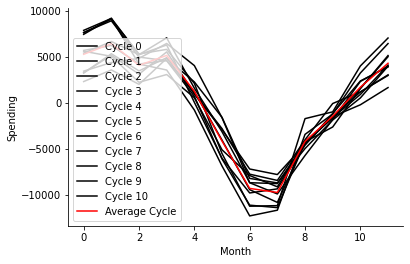

In [60]:
period = 12
cycleLen = period
numCycles = int(len(dfCS)/cycleLen + 0.5)
cycles = [dfCS.iloc[range(i*period,min((i+1)*period,len(dfCS)))]['R1Priv'] for i in range(numCycles)]
ptsInCycles = [dfCS.iloc[range(i,len(dfCS['R1Priv']),period)]['R1Priv'].tolist() for i in range(period)]
avg = [sum(pts)/len(pts) for pts in ptsInCycles]

fig,ax = plt.subplots()
for i in range(len(cycles)):
    ax.plot(cycles[i].values,label='Cycle '+str(i),c='k')
ax.plot(avg,label='Average Cycle',c='r')
ax.set_xlabel('Month')
ax.set_ylabel('Spending')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

A graph was created to show the different cycles that are in the data. 10 cycles were found in the data, and the red line in the graph above shows the average values at each stage (or month) in the cycle (or year). This will form the cyclicality component of the model. 

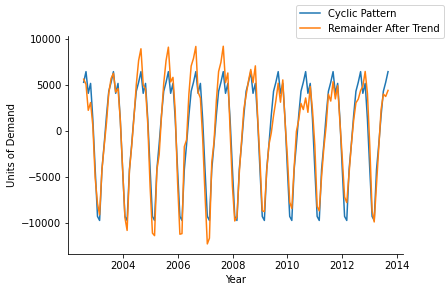

In [61]:
cycleLen = period   # see prior cell for computation of cyclicality period
numCycles = int(len(dfCS)/cycleLen + 0.5)
dfCS['CPriv'] = np.NaN   # Creates an empty column for the cyclicality component data
for i in range(len(dfCS)):
    dfCS.loc[dfCS.index[i], 'CPriv'] = avg[i % cycleLen] # Write appropriate cyclicality value

fig,ax = plt.subplots()
ax.plot(dfCS['CPriv'],label='Cyclic Pattern')
ax.plot(dfCS['R1Priv'],label='Remainder After Trend')
ax.set_xlabel('Year')
ax.set_ylabel('Units of Demand')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()

As you can see in the graph above, the average cyclicality that we found in the last step, seems to work well with the remainder of the data that was not taken care up by the trend moving average. 

Now that we have a model for both the trend and the cyclicality for the data, we can join these together an analyze how well out model does at estimating the Private Construction Spending for the time provided.  

In [62]:
dfCS['R2Priv'] = dfCS['R1Priv'] - dfCS['CPriv']
dfCS['R2ErrorPriv'] = abs(dfCS['R2Priv']/dfCS['Private Construction'])
dfCS['fitPriv'] = dfCS['MovAvg_Priv'] + dfCS['CPriv']
dfCS.drop(['sqErr_Priv'],axis=1,inplace=True)
dfCS['sqErrPriv'] = (dfCS['fitPriv']-dfCS['Private Construction'])**2
print('Average Error: ', sum(dfCS['R2ErrorPriv'])/len(dfCS))
print('Squared Error: ', sum(dfCS['sqErrPriv'])/len(dfCS))

Average Error:  0.020585783569537188
Squared Error:  2047767.4754545616


The calculated average error for the model the we created for the Private Contruction Spending is down around 2%, which is a very good model. 

Finally we see what the model looks like and to account for error that is the last portion of the model that we cannot determine. 

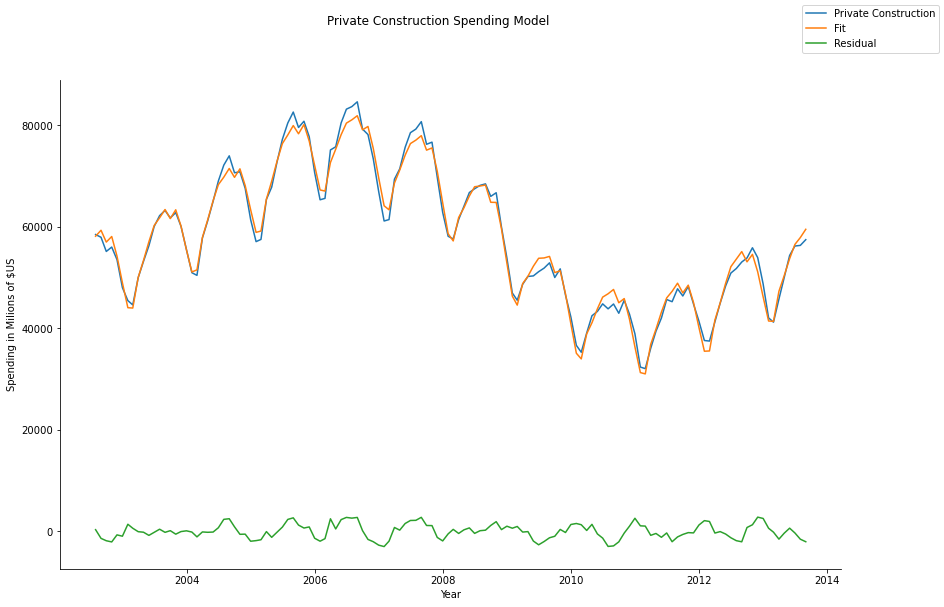

In [63]:
fig,ax = plt.subplots()
ax.plot(dfCS['Private Construction'],label='Private Construction')
ax.plot(dfCS['fitPriv'],label='Fit')
ax.plot(dfCS['R2Priv'],label='Residual')
ax.set_xlabel('Year')
ax.set_ylabel('Spending in Milions of $US')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.suptitle('Private Construction Spending Model')
fig.set_size_inches(14,9)
fig.legend()

The above graph shows the Private Construction data, the Fit model that was created, and the Residual that would be brought into the error of the model. 

Next, the Public Construction Model will be built in a very similar fashion. 

### Public Construction Spending Model 

As with the Private Construction Model we start looking at the overall trend of the data over the period of data that have been provided. Again a moving average with a window variable was chosen to collect this portion of the model. 

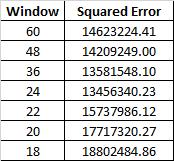

The table above shows the value of the window variable and the squared error that came from the following block of code. The lowest squared error number was found to be 24, which resulted in a fairly stable curve. 

Average Squared Error per Month:  14633163.175340222


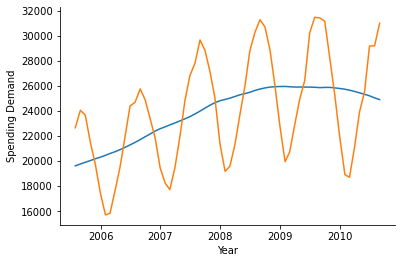

In [76]:
#Creating Moving Average and Squared Error
dfCS['MovAvg'] = np.NaN
dfCS['sqErr'] = np.NaN

#window creation
window = 24
window = window-window%2

#Computing the moving average in the loop using a window centered on the point whose avg is being computed
for i in range(int(window/2),dfCS.shape[0]-int(window/2)):
    dfCS.loc[dfCS.index[i],'MovAvg'] = (0.5*dfCS.iloc[i - int(window/2)]['Public Construction'] + dfCS.iloc[i - int(window/2)+1:i + int(window/2)]['Public Construction'].sum() + 0.5*dfCS.iloc[i + int(window/2)]['Public Construction'])/float(window)

dfCS['sqErr'] = (dfCS['Public Construction']- dfCS['MovAvg'])**2

dfCS.dropna(how='any',inplace=True)

fig,ax = plt.subplots()
ax.plot(dfCS['MovAvg'],label='Moving Avg.')
ax.plot(dfCS['Public Construction'],label='Public')
ax.set_xlabel('Year')
ax.set_ylabel('Spending Demand')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
print('Average Squared Error per Month: ',sum(dfCS['sqErr'])/len(dfCS))
  

From this point, the residual from the moving average can be used to see the remaining data that needs to be incorporated into the model. 

Average Residual:  192.6992607526882


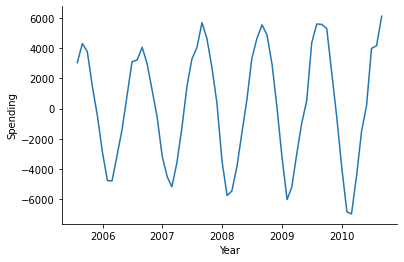

In [77]:
dfCS['R1'] = dfCS['Public Construction'] - dfCS['MovAvg']
dfCS['R1Error'] = abs((dfCS['Public Construction'] - dfCS['R1'])/dfCS['Public Construction'])
dfCS.style.format({
    'MovAvg': '{:.1f}'.format,
    'sqErr': '{:,.1f}'.format,
    'R1': '{:,.1f}'.format,
    'R1Error': '{:,.3f}'.format
})

fig,ax = plt.subplots()
ax.plot(dfCS['R1'])
ax.set_xlabel('Year')
ax.set_ylabel('Spending')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
print('Average Residual: ', sum(dfCS['R1'])/len(dfCS))

The graph above, shows this information and allows the cyclicality of the data to be approximated. 

In [78]:
maxCorr = 0.0
period = np.NaN
for i in range(1,24):
    corr = dfCS['R1'].autocorr(lag=i)
    print('Correlation, lag ',i,'   ',corr)
    if corr > maxCorr:
        maxCorr = corr
        period = i
print('period = ',period,'     Maximum Correlation = ',maxCorr)

Correlation, lag  1     0.8534368713684818
Correlation, lag  2     0.4861948700599509
Correlation, lag  3     -0.021016284219931528
Correlation, lag  4     -0.5054303956316488
Correlation, lag  5     -0.8458373928671818
Correlation, lag  6     -0.9649677597211918
Correlation, lag  7     -0.847539238378588
Correlation, lag  8     -0.49733196228311743
Correlation, lag  9     0.008063401367219773
Correlation, lag  10     0.49785854893871195
Correlation, lag  11     0.8491459968187294
Correlation, lag  12     0.984325644481308
Correlation, lag  13     0.8507166165376436
Correlation, lag  14     0.4837503226629494
Correlation, lag  15     -0.027243604202049816
Correlation, lag  16     -0.5087316421684371
Correlation, lag  17     -0.8479934326690859
Correlation, lag  18     -0.9656970381831109
Correlation, lag  19     -0.8447103750962117
Correlation, lag  20     -0.49170303593371834
Correlation, lag  21     0.01443130180835326
Correlation, lag  22     0.5072617226518233
Correlation, lag  23 

Again, the cyclicality portion of the Construction data, is show to have the highest correlation with a period of 12 months, suggesting a yearly cycle. This knowledge is then used in the next step of collecting 12 month periods, or cycles, that can be averaged to find an average for the entire data that can be used in the model.  

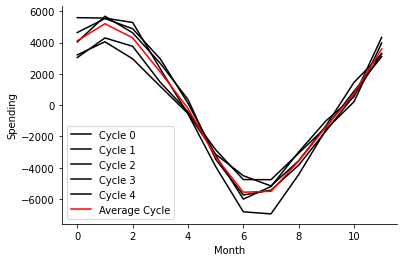

In [79]:
period = 12
cycleLen = period
numCycles = int(len(dfCS)/cycleLen + 0.5)
cycles = [dfCS.iloc[range(i*period,min((i+1)*period,len(dfCS)))]['R1'] for i in range(numCycles)]
ptsInCycles = [dfCS.iloc[range(i,len(dfCS['R1']),period)]['R1'].tolist() for i in range(period)]
avg = [sum(pts)/len(pts) for pts in ptsInCycles]

fig,ax = plt.subplots()
for i in range(len(cycles)):
    ax.plot(cycles[i].values,label='Cycle '+str(i),c='k')
ax.plot(avg,label='Average Cycle',c='r')
ax.set_xlabel('Month')
ax.set_ylabel('Spending')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

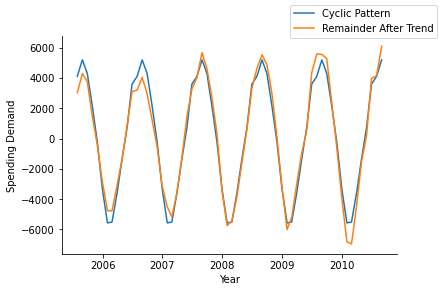

In [80]:
cycleLen = period   # see prior cell for computation of cyclicality period
numCycles = int(len(dfCS)/cycleLen + 0.5)
dfCS['C'] = np.NaN   # Creates an empty column for the cyclicality component data
for i in range(len(dfCS)):
    dfCS.loc[dfCS.index[i], 'C'] = avg[i % cycleLen] # Write appropriate cyclicality value

fig,ax = plt.subplots()
ax.plot(dfCS['C'],label='Cyclic Pattern')
ax.plot(dfCS['R1'],label='Remainder After Trend')
ax.set_xlabel('Year')
ax.set_ylabel('Spending Demand')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()

Graphing this average value on top of the remainder seems to show that the average does well estimating the spending over the time of the data.

The final step is to combine the Trend and Cyclicality that we found above and provide a model for the data. 

In [81]:
dfCS['R2Public'] = dfCS['R1'] - dfCS['C']
dfCS['R2ErrorPublic'] = abs(dfCS['R2Public']/dfCS['Public Construction'])
dfCS['fitPublic'] = dfCS['MovAvg'] + dfCS['C']
dfCS.drop(['sqErr'],axis=1,inplace=True)
dfCS['sqErrPublic'] = (dfCS['Public Construction']-dfCS['fitPublic'])**2
print('Average Error: ', sum(dfCS['R2ErrorPublic'])/len(dfCS))
print('Squared Error: ', sum(dfCS['sqErrPublic'])/len(dfCS))

Average Error:  0.022245172445270224
Squared Error:  405125.315679137


The above average Error and Squared Error show that the model does a very good job and explaining the Public Construction Spending. 

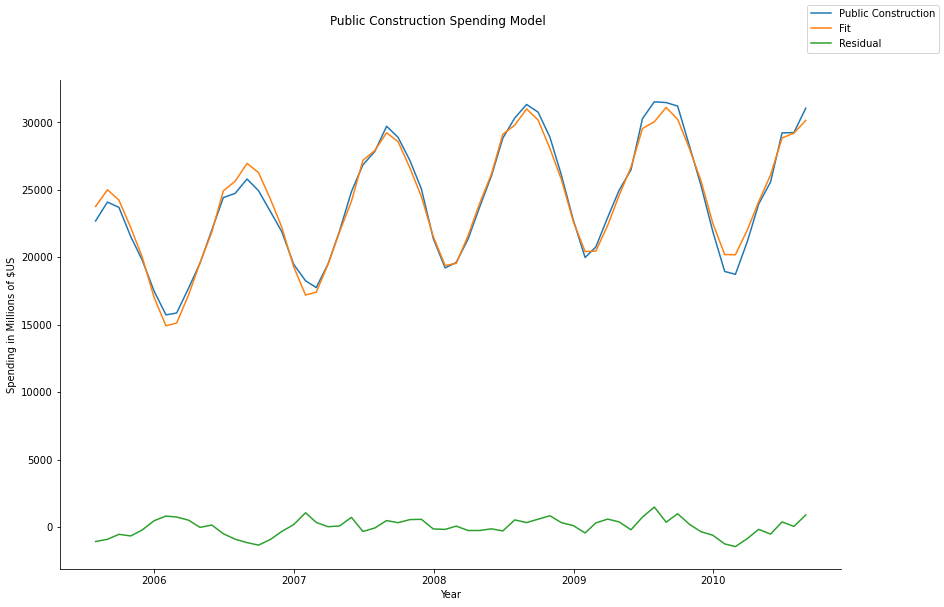

In [86]:
fig,ax = plt.subplots()
ax.plot(dfCS['Public Construction'],label='Public Construction')
ax.plot(dfCS['fitPublic'],label='Fit')
ax.plot(dfCS['R2Public'],label='Residual')
ax.set_xlabel('Year')
ax.set_ylabel('Spending in Millions of $US')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.suptitle('Public Construction Spending Model')
fig.set_size_inches(14,9)
fig.legend()